In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
db = pd.read_csv('train.csv')

In [6]:
db

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

In [7]:
db.shape


(42000, 785)

In [8]:
db.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
24333      0       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
24333       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
24333         0         0         0         0         0  

[1 rows x 785 columns]

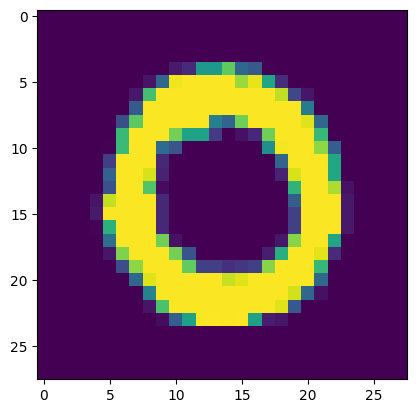

In [9]:


plt.imshow(db.iloc[1,1:].values.reshape(28,28))


In [10]:

x = db.iloc[:,1:]
y = db.iloc[:,0]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
X_test, X_test

(       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 5457        0       0       0       0       0       0       0       0       0   
 38509       0       0       0       0       0       0       0       0       0   
 25536       0       0       0       0       0       0       0       0       0   
 31803       0       0       0       0       0       0       0       0       0   
 39863       0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 8388        0       0       0       0       0       0       0       0       0   
 29359       0       0       0       0       0       0       0       0       0   
 40276       0       0       0       0       0       0       0       0       0   
 18421       0       0       0       0       0       0       0       0       0   
 4335        0       0       0       0       0       0       0       0       0   
 
        pixel9

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
import time
start = time.time()
y_Pred = knn.predict(X_test)
end = time.time()
print('Time taken:', end - start)

Time taken: 23.976776123046875


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_Pred)

0.9648809523809524

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train, X_test,X_train.shape, X_test.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (33600, 784),
 (8400, 784))

In [21]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [22]:
X_train_tr = pca.fit_transform(X_train)
X_test_tr = pca.transform(X_test)

In [23]:
X_train.shape, X_test.shape,X_train_tr.shape, X_test_tr.shape

((33600, 784), (8400, 784), (33600, 100), (8400, 100))

In [24]:
knn = KNeighborsClassifier()

In [25]:
knn.fit(X_train_tr, y_train)

KNeighborsClassifier()

In [26]:
y_Pred = knn.predict(X_test_tr)

In [27]:
accuracy_score(y_test, y_Pred)

0.9539285714285715

In [28]:

for i in range(1, 3):
    pca = PCA(n_components=i)
    X_train_tr = pca.fit_transform(X_train)
    X_test_tr = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_tr, y_train)
    y_Pred = knn.predict(X_test_tr)
    print(i, accuracy_score(y_test, y_Pred))

1 0.256547619047619
2 0.32404761904761903


import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(
    x=X_train_tr[:,0], y=X_train_tr[:,1], color=y_train_trf,
    labels={'x':'PC1', 'y':'PC2'}, title='PCA'
)

In [29]:

pca = PCA(n_components=2)
X_train_tr = pca.fit_transform(X_train)
X_test_tr = pca.transform(X_test)


In [30]:
X_train_tr.shape, X_test_tr.shape

((33600, 2), (8400, 2))

In [31]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(
    x=X_train_tr[:,0], y=X_train_tr[:,1], color=y_train_trf,
    labels={'x':'PC1', 'y':'PC2'}, title='PCA'
)

In [32]:
fig.show()

In [33]:
pca = PCA(n_components=3)
X_train_tr = pca.fit_transform(X_train)
X_test_tr = pca.transform(X_test)
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(
    x=X_train_tr[:,0], y=X_train_tr[:,1], z=X_train_tr[:,2], color=y_train_trf,
    labels={'x':'PC1', 'y':'PC2', 'z':'PC3'}, title='PCA'
)
fig.show()

In [34]:
pca.explained_variance_
# Eigan values


array([40.67111198, 29.17023401, 26.74459614])

In [35]:
pca.components_.shape
# Eigan vectors

(3, 784)

In [36]:

pca.explained_variance_ratio_
# Eigan values in percentage

array([0.05785192, 0.0414927 , 0.03804239])

In [37]:

pca = PCA(n_components=None)
X_train_tr = pca.fit_transform(X_train)
X_test_tr = pca.transform(X_test)


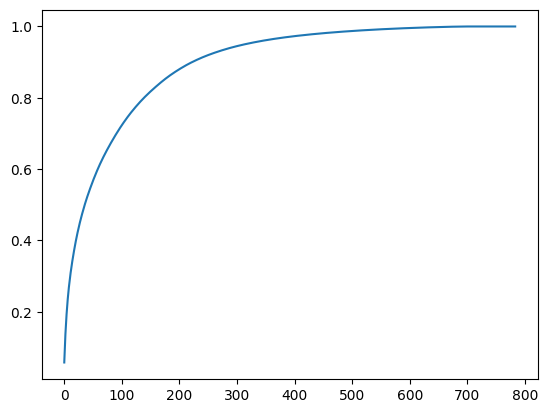

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))